<a href="https://colab.research.google.com/github/morningbob/NLP_tryout_2023/blob/main/Copy_of_handwritting_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras.optimizers import Adam

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/codelabs/written_name_train_v2.csv')
valid = pd.read_csv('/content/drive/MyDrive/codelabs/written_name_validation_v2.csv')


In [ ]:
#!ls -lha kaggle.json


-rw-r--r-- 1 root root 68 Mar 29 19:12 kaggle.json


In [ ]:
#!pip install -q kaggle

In [ ]:
#!mkdir -p ~/.kaggle

In [ ]:
#!cp kaggle.json ~/.kaggle/

In [ ]:
#!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
#!pwd

/content


In [ ]:
#!kaggle datasets list




ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ---------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                         Spotify and Youtube                             9MB  2023-03-20 15:43:25           2115         87  1.0              
dgoenrique/netflix-movies-and-tv-shows                        Netflix Movies and TV Shows                     2MB  2023-03-13 18:49:00           1447         39  1.0              
rajkumarpandey02/list-of-countries-by-gdp-sector-composition  List of Countries by GDP Sector Composition     8KB  2023-03-20 04:42:10           1310         45  1.0              
datascientistanna/customers-dataset                           Shop Customer Data                    

In [ ]:
#!kaggle datasets download -d varsharainer/dna-sequencing-classifier

403 - Forbidden


In [ ]:
#!unzip /content/drive/MyDrive/codelabs/written_name_train_v2.csv.zip -d /content/drive/MyDrive/codelabs/test/

!unzip /content/drive/MyDrive/codelabs/train.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/TRAIN_312874.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_312874.jpg  
  inflating: /content/train/TRAIN_27245.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_27245.jpg  
  inflating: /content/train/TRAIN_133816.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_133816.jpg  
  inflating: /content/train/TRAIN_228256.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_228256.jpg  
  inflating: /content/train/TRAIN_102413.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_102413.jpg  
  inflating: /content/train/TRAIN_07195.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_07195.jpg  
  inflating: /content/train/TRAIN_247849.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_247849.jpg  
  inflating: /content/train/TRAIN_28176.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_28176.jpg  
  inflating: /content/train/TRAIN_227165.jpg  
  inflating: /content/__MACOSX/train/._TRAIN_227165.jpg  
  inflatin

In [ ]:
!unzip /content/drive/MyDrive/codelabs/validation_v2.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/validation_v2/validation/VALIDATION_15359.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_15359.jpg  
  inflating: /content/validation_v2/validation/VALIDATION_35089.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_35089.jpg  
  inflating: /content/validation_v2/validation/VALIDATION_14047.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_14047.jpg  
  inflating: /content/validation_v2/validation/VALIDATION_2442.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_2442.jpg  
  inflating: /content/validation_v2/validation/VALIDATION_34397.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_34397.jpg  
  inflating: /content/validation_v2/validation/VALIDATION_13728.jpg  
  inflating: /content/__MACOSX/validation_v2/validation/._VALIDATION_13728.jpg  
  inflating: /content/validation_v2/validatio

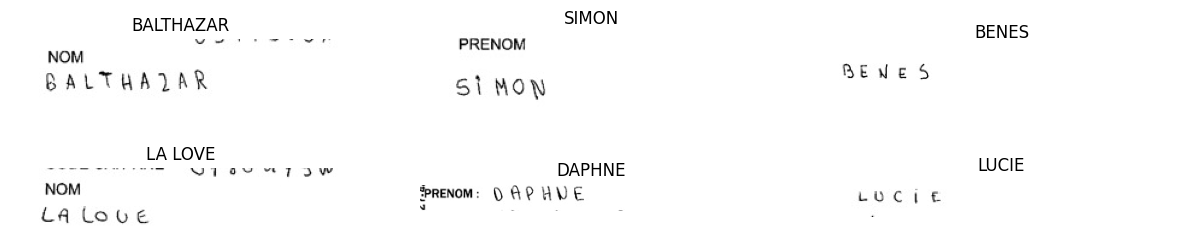

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
print("Number of NaNs in train set      : ", train['IDENTITY'].isnull().sum())
print("Number of NaNs in validation set : ", valid['IDENTITY'].isnull().sum())

Number of NaNs in train set      :  565
Number of NaNs in validation set :  78


In [ ]:
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

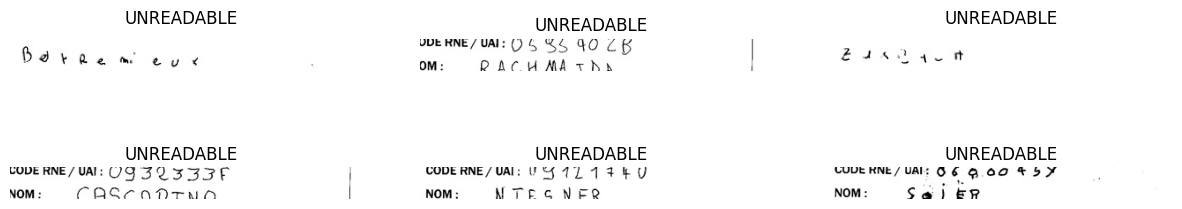

In [ ]:
unreadable = train[train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace = True, drop=True)

plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'train/'+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
print("Number of NaNs in train set      : ", train['IDENTITY'].isnull().sum())
print("Number of NaNs in validation set : ", valid['IDENTITY'].isnull().sum())

Number of NaNs in train set      :  0
Number of NaNs in validation set :  0


In [ ]:
train.dropna(axis=0, inplace=True)
valid.dropna(axis=0, inplace=True)

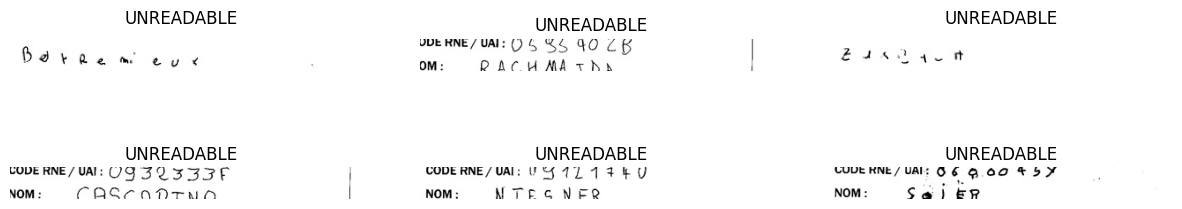

In [ ]:
unreadable = train[train['IDENTITY'] == 'UNREADABLE']
unreadable.reset_index(inplace = True, drop=True)

plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'train/'+unreadable.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(unreadable.loc[i, 'IDENTITY'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:

# Also, there are some images in our data with the label 'UNREADABLE'. Lets check those images and remove them.
train = train[train['IDENTITY'] != 'UNREADABLE']
valid = valid[valid['IDENTITY'] != 'UNREADABLE']

In [ ]:
train['IDENTITY'] = train['IDENTITY'].str.upper()
valid['IDENTITY'] = valid['IDENTITY'].str.upper()

In [ ]:
train.reset_index(inplace = True, drop=True) 
valid.reset_index(inplace = True, drop=True)

In [ ]:
#Preprocessing and preparing the images for training
#The images are loaded as grayscale and reshaped to width 256 and height 64.
#The width and height are cropped if they are greater than 256 and 64 respectively. If they are smaller, then the image is padded with white pixels. Finally the image is rotated clockwise to bring the image shape to (x, y).
#The image is then normalized to range [0, 1]

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 256])*255 # blank white image
    
    # crop
    if w > 256:
        img = img[:, :256]
        
    if h > 64:
        img = img[:64, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [ ]:
#The model will be trained on 30000 images and validate on 3000 images
train_size = 30000
valid_size= 3000

In [ ]:
train_x = []

for i in range(train_size):
    img_dir = 'train/'+train.loc[i, 'FILENAME']
    print(train.loc[i, 'FILENAME'])
    print(len(train))
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    train_x.append(image)

Streaming output truncated to the last 5000 lines.
TRAIN_27556.jpg
330294
TRAIN_27557.jpg
330294
TRAIN_27558.jpg
330294
TRAIN_27559.jpg
330294
TRAIN_27560.jpg
330294
TRAIN_27561.jpg
330294
TRAIN_27562.jpg
330294
TRAIN_27563.jpg
330294
TRAIN_27564.jpg
330294
TRAIN_27565.jpg
330294
TRAIN_27566.jpg
330294
TRAIN_27567.jpg
330294
TRAIN_27568.jpg
330294
TRAIN_27569.jpg
330294
TRAIN_27570.jpg
330294
TRAIN_27571.jpg
330294
TRAIN_27572.jpg
330294
TRAIN_27573.jpg
330294
TRAIN_27574.jpg
330294
TRAIN_27575.jpg
330294
TRAIN_27576.jpg
330294
TRAIN_27577.jpg
330294
TRAIN_27578.jpg
330294
TRAIN_27579.jpg
330294
TRAIN_27580.jpg
330294
TRAIN_27581.jpg
330294
TRAIN_27582.jpg
330294
TRAIN_27583.jpg
330294
TRAIN_27584.jpg
330294
TRAIN_27585.jpg
330294
TRAIN_27586.jpg
330294
TRAIN_27587.jpg
330294
TRAIN_27588.jpg
330294
TRAIN_27589.jpg
330294
TRAIN_27590.jpg
330294
TRAIN_27591.jpg
330294
TRAIN_27592.jpg
330294
TRAIN_27593.jpg
330294
TRAIN_27594.jpg
330294
TRAIN_27595.jpg
330294
TRAIN_27596.jpg
330294
TRAIN_

In [ ]:
valid_x = []

for i in range(valid_size):
    img_dir = 'validation_v2/validation/'+valid.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    valid_x.append(image)

In [ ]:
train_x = np.array(train_x).reshape(-1, 256, 64, 1)
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)

In [ ]:
#Preparing the labels for CTC Loss
#Learn more about CTC loss and why its amazing for text recognition from here.

#The labels have to be converted to numbers which represent each character in the training set. The 'alphabets' consist of A-Z and three special characters (- ' and space).

In [ ]:
alphabets = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_str_len = 24 # max length of input labels
num_of_characters = len(alphabets) + 1 # +1 for ctc pseudo blank
num_of_timestamps = 64 # max length of predicted labels


def label_to_num(label):
    label_num = []
    for ch in label:
        label_num.append(alphabets.find(ch))
        
    return np.array(label_num)

def num_to_label(num):
    ret = ""
    for ch in num:
        if ch == -1:  # CTC Blank
            break
        else:
            ret+=alphabets[ch]
    return ret

In [ ]:
name = 'JEBASTIN'
print(name, '\n',label_to_num(name))

JEBASTIN 
 [ 9  4  1  0 18 19  8 13]


In [ ]:
#JEBASTIN 
# [ 9  4  1  0 18 19  8 13]
#train_y contains the true labels converted to numbers and padded with -1. The length of each label is equal to max_str_len.
#train_label_len contains the length of each true label (without padding)
#train_input_len contains the length of each predicted label. The length of all the predicted labels is constant i.e number of timestamps - 2.
#train_output is a dummy output for ctc loss.

In [ ]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])]= label_to_num(train.loc[i, 'IDENTITY'])    

In [ ]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(valid.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(valid.loc[i, 'IDENTITY'])]= label_to_num(valid.loc[i, 'IDENTITY'])    

In [ ]:
print('True label : ',train.loc[100, 'IDENTITY'] , '\ntrain_y : ',train_y[100],'\ntrain_label_len : ',train_label_len[100], 
      '\ntrain_input_len : ', train_input_len[100])

True label :  NOUR 
train_y :  [13. 14. 20. 17. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.] 
train_label_len :  [4.] 
train_input_len :  [62.]


In [ ]:
input_data = Input(shape=(256, 64, 1), name='input')

inner = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max1')(inner)

inner = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(2, 2), name='max2')(inner)
inner = Dropout(0.3)(inner)

inner = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(inner)
inner = BatchNormalization()(inner)
inner = Activation('relu')(inner)
inner = MaxPooling2D(pool_size=(1, 2), name='max3')(inner)
inner = Dropout(0.3)(inner)

# CNN to RNN
inner = Reshape(target_shape=((64, 1024)), name='reshape')(inner)
inner = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(inner)
inner = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(inner)

## OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 64, 1)]      0         
                                                                 
 conv1 (Conv2D)              (None, 256, 64, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 256, 64, 32)      128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 64, 32)       0         
                                                                 
 max1 (MaxPooling2D)         (None, 128, 32, 32)       0         
                                                                 
 conv2 (Conv2D)              (None, 128, 32, 64)       18496     
                                                             

In [ ]:
#The output shape of the predictions is (64, 30). The model predicts words of 64 characters and each character contains the probability of the 30 alphabets which we defined earlier.

def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [ ]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [ ]:
# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Adam(lr = 0.0001))

model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=60, batch_size=128)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/60


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


235/235 [==============================] - 72s 230ms/step - loss: 24.8839 - val_loss: 20.6652
Epoch 2/60
235/235 [==============================] - 52s 219ms/step - loss: 20.1632 - val_loss: 20.1002
Epoch 3/60
235/235 [==============================] - 52s 221ms/step - loss: 19.8092 - val_loss: 19.8440
Epoch 4/60
235/235 [==============================] - 52s 222ms/step - loss: 19.3074 - val_loss: 19.4806
Epoch 5/60
235/235 [==============================] - 52s 222ms/step - loss: 18.7100 - val_loss: 18.8848
Epoch 6/60
235/235 [==============================] - 52s 223ms/step - loss: 17.8322 - val_loss: 18.5193
Epoch 7/60
235/235 [==============================] - 52s 221ms/step - loss: 16.5166 - val_loss: 16.5821
Epoch 8/60
235/235 [==============================] - 53s 225ms/step - loss: 14.9172 - val_loss: 14.8913
Epoch 9/60
235/235 [==============================] - 53s 224ms/step - loss: 13.1823 - val_loss: 13.8276
Epoch 10/60
235/235 [==============================] - 52s 223ms/s

In [ ]:
preds = model.predict(valid_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []
for i in range(valid_size):
    prediction.append(num_to_label(decoded[i]))

94/94 [==============================] - 3s 18ms/step


In [ ]:
y_true = valid.loc[0:valid_size, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0

for i in range(valid_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/valid_size))

Correct characters predicted : 88.09%
Correct words predicted      : 73.93%


TypeError: ignored

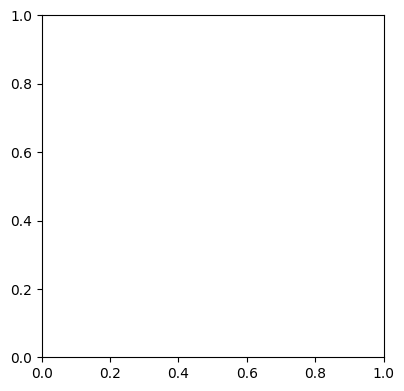

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/codelabs/written_name_test_v2.csv')

plt.figure(figsize=(15, 10))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    
    image = preprocess(image)
    image = image/255.
    pred = model.predict(image.reshape(1, 256, 64, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(num_to_label(decoded[0]), fontsize=12)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
#Ways to improve the model
#Use more training samples. This will help the model to learn and generalise better. I have used only 10% of the images as the entire training set cannot be loaded into kaggle's memory.
#There are multiple images in the training set which are not at all legible to the human eye. Removing such images will help in model's learning.
#P.S : This is my first Kaggle notebook. Any feedback would be highly appreciated

In [ ]:
#model = ...  # Get model (Sequential, Functional Model, or Model subclass)
#model.save('path/to/location')

model_final.save('/content/drive/MyDrive/codelabs/handwriting_model/')

In [ ]:
#from tensorflow import keras
#model = keras.models.load_model('path/to/location')